In [1]:
from google.colab import drive
# drive.mount('../content/drive', force_remount=True)
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Make sure that you add a shortcut to the folder in My Drive before running this cell
!ls /content/drive/MyDrive/'team1blob'

LA_Air_Quality.parquet		 Silver_Coal_New_England.parquet
la_aqi_monthly_agg.parquet	 Silver_Natural_Gas_LA.parquet
New_England_Air_Quality.parquet  Silver_Natural_Gas_New_England.parquet
Silver_Coal_LA.parquet


In [3]:
import pandas as pd

In [4]:
# read files
ne_air_quality_df = pd.read_parquet('/content/drive/MyDrive/team1blob/New_England_Air_Quality.parquet')
la_air_quality_df = pd.read_parquet('/content/drive/MyDrive/team1blob/LA_Air_Quality.parquet')

ne_natural_df = pd.read_parquet('/content/drive/MyDrive/team1blob/Silver_Natural_Gas_New_England.parquet')
la_natural_df = pd.read_parquet('/content/drive/MyDrive/team1blob/Silver_Natural_Gas_LA.parquet')

ne_coal_df = pd.read_parquet('/content/drive/MyDrive/team1blob/Silver_Coal_New_England.parquet')
la_coal_df = pd.read_parquet('/content/drive/MyDrive/team1blob/Silver_Coal_LA.parquet')

In [5]:
ne_air_quality_df.head()

,coord,list,co,nh3,no,no2,o3,pm10,pm2_5,so2,timestamp,aqi,corrected_timestamp,location,id
0,"{'lon': -71.0589, 'lat': 42.3601}",2,383.85,1.08,0.20,40.44,22.53,7.09,5.43,3.43,1606435200,2,2020-11-27 00:00:00,Boston,Boston_1606435200
1,"{'lon': -71.0589, 'lat': 42.3601}",2,390.53,1.11,0.36,40.44,18.24,7.89,5.95,3.01,1606438800,2,2020-11-27 01:00:00,Boston,Boston_1606438800
2,"{'lon': -71.0589, 'lat': 42.3601}",2,427.25,1.22,1.38,44.55,8.49,10.25,8.02,3.01,1606442400,2,2020-11-27 02:00:00,Boston,Boston_1606442400
3,"{'lon': -71.0589, 'lat': 42.3601}",2,460.63,1.33,5.03,46.61,1.65,12.57,10.23,3.10,1606446000,2,2020-11-27 03:00:00,Boston,Boston_1606446000
4,"{'lon': -71.0589, 'lat': 42.3601}",2,467.30,1.19,8.83,43.53,0.26,13.18,11.09,3.01,1606449600,2,2020-11-27 04:00:00,Boston,Boston_1606449600


In [6]:
la_air_quality_df.head()

,coord,list,co,nh3,no,no2,o3,pm10,pm2_5,so2,timestamp,aqi,corrected_timestamp,location,id
0,"{'lon': -118.2437, 'lat': 34.0522}",1,213.62,0.75,0.71,9.68,77.96,10.01,2.13,2.68,1606435200,1,2020-11-27 00:00:00,Boston,Boston_1606435200
1,"{'lon': -118.2437, 'lat': 34.0522}",2,357.15,2.53,1.03,47.30,34.33,15.27,4.88,4.47,1606438800,2,2020-11-27 01:00:00,Boston,Boston_1606438800
2,"{'lon': -118.2437, 'lat': 34.0522}",2,607.49,5.13,21.68,75.40,0.51,23.32,10.51,5.42,1606442400,2,2020-11-27 02:00:00,Boston,Boston_1606442400
3,"{'lon': -118.2437, 'lat': 34.0522}",2,767.71,6.97,44.70,76.77,0.00,31.73,16.25,5.48,1606446000,2,2020-11-27 03:00:00,Boston,Boston_1606446000
4,"{'lon': -118.2437, 'lat': 34.0522}",3,827.79,7.98,53.64,76.08,0.00,38.25,20.44,5.36,1606449600,3,2020-11-27 04:00:00,Boston,Boston_1606449600


In [7]:
# Manually fix location
la_air_quality_df['location'] = 'LA'
la_air_quality_df.head()

,coord,list,co,nh3,no,no2,o3,pm10,pm2_5,so2,timestamp,aqi,corrected_timestamp,location,id
0,"{'lon': -118.2437, 'lat': 34.0522}",1,213.62,0.75,0.71,9.68,77.96,10.01,2.13,2.68,1606435200,1,2020-11-27 00:00:00,LA,Boston_1606435200
1,"{'lon': -118.2437, 'lat': 34.0522}",2,357.15,2.53,1.03,47.30,34.33,15.27,4.88,4.47,1606438800,2,2020-11-27 01:00:00,LA,Boston_1606438800
2,"{'lon': -118.2437, 'lat': 34.0522}",2,607.49,5.13,21.68,75.40,0.51,23.32,10.51,5.42,1606442400,2,2020-11-27 02:00:00,LA,Boston_1606442400
3,"{'lon': -118.2437, 'lat': 34.0522}",2,767.71,6.97,44.70,76.77,0.00,31.73,16.25,5.48,1606446000,2,2020-11-27 03:00:00,LA,Boston_1606446000
4,"{'lon': -118.2437, 'lat': 34.0522}",3,827.79,7.98,53.64,76.08,0.00,38.25,20.44,5.36,1606449600,3,2020-11-27 04:00:00,LA,Boston_1606449600


In [8]:
# convert timestamp to yyy-mm-dd
ne_air_quality_df['corrected_timestamp'] = ne_air_quality_df['corrected_timestamp'].dt.to_period('D')
la_air_quality_df['corrected_timestamp'] = la_air_quality_df['corrected_timestamp'].dt.to_period('D')

In [9]:
# Aggregate daily average of aqi

ne_daily_aqi_df = round(ne_air_quality_df.groupby(['corrected_timestamp'])['aqi'].mean(), 2).reset_index()
la_daily_aqi_df = round(la_air_quality_df.groupby(['corrected_timestamp'])['aqi'].mean(), 2).reset_index()
print(ne_daily_aqi_df.head())
print(la_daily_aqi_df.head())

  corrected_timestamp   aqi
0          2020-11-27  1.96
1          2020-11-28  1.62
2          2020-11-29  1.08
3          2020-11-30  1.58
4          2020-12-01  1.46
  corrected_timestamp   aqi
0          2020-11-27  3.25
1          2020-11-28  3.33
2          2020-11-29  3.79
3          2020-11-30  4.21
4          2020-12-01  4.58


In [10]:
ne_natural_df['period'] = pd.to_datetime(ne_natural_df['period'])
la_natural_df['period'] = pd.to_datetime(la_natural_df['period'])
ne_natural_df['period'] = ne_natural_df['period'].dt.to_period('D')
la_natural_df['period'] = la_natural_df['period'].dt.to_period('D')
print(ne_natural_df.head())
print(la_natural_df.head())

       period respondent  respondent-name    type-name timezone   value  \
0  2024-11-20       ISNE  ISO New England  Natural Gas  Eastern  175462   
1  2024-11-19       ISNE  ISO New England  Natural Gas  Eastern  175081   
2  2024-11-18       ISNE  ISO New England  Natural Gas  Eastern  169011   
3  2024-11-17       ISNE  ISO New England  Natural Gas  Eastern  156379   
4  2024-11-16       ISNE  ISO New England  Natural Gas  Eastern  153889   

     value-units  
0  megawatthours  
1  megawatthours  
2  megawatthours  
3  megawatthours  
4  megawatthours  
       period respondent                            respondent-name  \
0  2024-11-20       LDWP  Los Angeles Department of Water and Power   
1  2024-11-19       LDWP  Los Angeles Department of Water and Power   
2  2024-11-18       LDWP  Los Angeles Department of Water and Power   
3  2024-11-17       LDWP  Los Angeles Department of Water and Power   
4  2024-11-16       LDWP  Los Angeles Department of Water and Power   

     typ

In [11]:
ne_coal_df['period'] = pd.to_datetime(ne_coal_df['period'])
la_coal_df['period'] = pd.to_datetime(la_coal_df['period'])
ne_coal_df['period'] = ne_coal_df['period'].dt.to_period('D')
la_coal_df['period'] = la_coal_df['period'].dt.to_period('D')
print(ne_coal_df.head())
print(la_coal_df.head())

       period respondent  respondent-name type-name timezone value  \
0  2024-11-19       ISNE  ISO New England      Coal  Eastern    17   
1  2024-11-18       ISNE  ISO New England      Coal  Eastern    16   
2  2024-11-15       ISNE  ISO New England      Coal  Eastern    64   
3  2024-11-14       ISNE  ISO New England      Coal  Eastern    60   
4  2024-11-13       ISNE  ISO New England      Coal  Eastern    92   

     value-units  
0  megawatthours  
1  megawatthours  
2  megawatthours  
3  megawatthours  
4  megawatthours  
       period respondent                            respondent-name type-name  \
0  2024-11-20       LDWP  Los Angeles Department of Water and Power      Coal   
1  2024-11-19       LDWP  Los Angeles Department of Water and Power      Coal   
2  2024-11-18       LDWP  Los Angeles Department of Water and Power      Coal   
3  2024-11-16       LDWP  Los Angeles Department of Water and Power      Coal   
4  2024-11-15       LDWP  Los Angeles Department of Water an

In [12]:
# Merge data
ne_natural_aqi_df = ne_daily_aqi_df.rename(columns={'corrected_timestamp': 'period'}).merge(ne_natural_df, on='period', how='left')
print(ne_natural_aqi_df.head())

la_natural_aqi_df = la_daily_aqi_df.rename(columns={'corrected_timestamp': 'period'}).merge(la_natural_df, on='period', how='left')
print(la_natural_aqi_df.head())

ne_coal_aqi_df = ne_daily_aqi_df.rename(columns={'corrected_timestamp': 'period'}).merge(ne_coal_df, on='period', how='left')
print(ne_coal_aqi_df.head())

la_coal_aqi_df = la_daily_aqi_df.rename(columns={'corrected_timestamp': 'period'}).merge(la_coal_df, on='period', how='left')
print(la_coal_aqi_df.head())

       period   aqi respondent  respondent-name    type-name timezone   value  \
0  2020-11-27  1.96       ISNE  ISO New England  Natural Gas  Eastern   90918   
1  2020-11-28  1.62       ISNE  ISO New England  Natural Gas  Eastern   88848   
2  2020-11-29  1.08       ISNE  ISO New England  Natural Gas  Eastern   82592   
3  2020-11-30  1.58       ISNE  ISO New England  Natural Gas  Eastern  108252   
4  2020-12-01  1.46       ISNE  ISO New England  Natural Gas  Eastern   85534   

     value-units  
0  megawatthours  
1  megawatthours  
2  megawatthours  
3  megawatthours  
4  megawatthours  
       period   aqi respondent                            respondent-name  \
0  2020-11-27  3.25       LDWP  Los Angeles Department of Water and Power   
1  2020-11-28  3.33       LDWP  Los Angeles Department of Water and Power   
2  2020-11-29  3.79       LDWP  Los Angeles Department of Water and Power   
3  2020-11-30  4.21       LDWP  Los Angeles Department of Water and Power   
4  2020-12-01 

In [13]:
print(len(ne_natural_aqi_df))
print(len(la_natural_aqi_df))
print(len(ne_coal_aqi_df))
print(len(la_natural_aqi_df))

1434
1434
1434
1434


In [14]:
ne_mergred_df = ne_natural_aqi_df.merge(ne_coal_aqi_df, on=['period', 'aqi', 'value-units', 'respondent-name', 'timezone', 'respondent'], how='left')
ne_mergred_df = ne_mergred_df.rename(columns={'value_x': 'natural_gas_value', 'value_y': 'coal_value'})
ne_mergred_df.head()

,period,aqi,respondent,respondent-name,type-name_x,timezone,natural_gas_value,value-units,type-name_y,coal_value
0,2020-11-27,1.96,ISNE,ISO New England,Natural Gas,Eastern,90918,megawatthours,Coal,139
1,2020-11-28,1.62,ISNE,ISO New England,Natural Gas,Eastern,88848,megawatthours,Coal,15
2,2020-11-29,1.08,ISNE,ISO New England,Natural Gas,Eastern,82592,megawatthours,Coal,15
3,2020-11-30,1.58,ISNE,ISO New England,Natural Gas,Eastern,108252,megawatthours,Coal,76
4,2020-12-01,1.46,ISNE,ISO New England,Natural Gas,Eastern,85534,megawatthours,Coal,11


In [15]:
la_mergred_df = la_natural_aqi_df.merge(la_coal_aqi_df, on=['period', 'aqi', 'value-units', 'respondent-name', 'timezone', 'respondent'], how='left')
la_mergred_df = la_mergred_df.rename(columns={'value_x': 'natural_gas_value', 'value_y': 'coal_value'})
la_mergred_df.head()

,period,aqi,respondent,respondent-name,type-name_x,timezone,natural_gas_value,value-units,type-name_y,coal_value
0,2020-11-27,3.25,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,21804,megawatthours,Coal,16935
1,2020-11-28,3.33,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,21487,megawatthours,Coal,16914
2,2020-11-29,3.79,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,23278,megawatthours,Coal,16491
3,2020-11-30,4.21,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,21965,megawatthours,Coal,18664
4,2020-12-01,4.58,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,17977,megawatthours,Coal,31527


**Parameter 'order' to set**

p: The lag order, representing the number of lag observations incorporated in the model.

d: Degree of differencing, denoting the number of times raw observations undergo differencing.

q: Order of moving average, indicating the size of the moving average window.

helpful sources?

- https://www.linkedin.com/pulse/time-series-episode-3-arima-forecasting-exogenous-vasilis-kalyvas-c09kf/
- https://buse-koseoglu13.medium.com/guide-to-time-series-analysis-with-python-4-arima-and-sarima-d62bcdcfb64a
- https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

Additional model?
- https://github.com/amazon-science/chronos-forecasting

Vector Autoregressive Model

https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In [16]:
# ne_mergred_df['period'] = pd.to_datetime(ne_mergred_df.period, format = '%d/%m/%Y %H.%M.%S')
var_data = ne_mergred_df.drop(['period'], axis=1)
var_data.index = ne_mergred_df.period
var_data = var_data[['aqi', 'natural_gas_value', 'coal_value']]
var_data

,aqi,natural_gas_value,coal_value
period,,,
2020-11-27,1.96,90918,139
2020-11-28,1.62,88848,15
2020-11-29,1.08,82592,15
2020-11-30,1.58,108252,76
2020-12-01,1.46,85534,11
...,...,...,...
2024-10-29,1.58,225215,78
2024-10-30,1.83,200143,79
2024-10-31,2.21,186798,NaN


In [17]:
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np

In [18]:
var_data = var_data.dropna()
var_data['natural_gas_value'] = var_data['natural_gas_value'].astype(int)
var_data['coal_value'] = var_data['coal_value'].astype(int)
var_data

<ipython-input-18-380f53250986>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_data['natural_gas_value'] = var_data['natural_gas_value'].astype(int)
<ipython-input-18-380f53250986>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_data['coal_value'] = var_data['coal_value'].astype(int)


,aqi,natural_gas_value,coal_value
period,,,
2020-11-27,1.96,90918,139
2020-11-28,1.62,88848,15
2020-11-29,1.08,82592,15
2020-11-30,1.58,108252,76
2020-12-01,1.46,85534,11
...,...,...,...
2024-10-28,1.33,203842,25
2024-10-29,1.58,225215,78
2024-10-30,1.83,200143,79


In [19]:
var_train = var_data[:int(0.8*(len(var_data)))]
var_test = var_data[int(0.8*(len(var_data))):]

In [20]:
var_train.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 824 entries, 2020-11-27 to 2023-12-25
Freq: D
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aqi                824 non-null    float64
 1   natural_gas_value  824 non-null    int64  
 2   coal_value         824 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 25.8 KB


In [21]:
var_model = VAR(np.asarray(var_train))
var_model_fit = var_model.fit()

In [22]:
lags = var_model.select_order(maxlags=12)
lags.summary()

,AIC,BIC,FPE,HQIC
0,36.25,36.26,5.513e+15,36.25
1,33.39,33.46*,3.175e+14,33.42*
2,33.40,33.52,3.193e+14,33.44
3,33.37,33.54,3.099e+14,33.43
4,33.37,33.59,3.100e+14,33.45
5,33.37,33.65,3.120e+14,33.48
6,33.36,33.69,3.068e+14,33.48
7,33.35*,33.73,3.048e+14*,33.50
8,33.36,33.79,3.075e+14,33.53
9,33.37,33.86,3.121e+14,33.56


In [23]:
var_model_fit = var_model.fit(7)
var_model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 13, Dec, 2024
Time:                     06:09:57
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    33.7295
Nobs:                     817.000    HQIC:                   33.4952
Log likelihood:          -17035.0    FPE:                3.04401e+14
AIC:                      33.3493    Det(Omega_mle):     2.81078e+14
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.624043         0.106898            5.838           0.000
L1.y1         0.467932         0.036530           12.809           0.000
L1.y2         0.000000         0.000001            0.298           0.766
L1.y3         0.000010

In [24]:
lag_order = var_model_fit.k_ar
lag_order

7

In [25]:
forecast_input = var_test.values
forecast_input

array([[3.08000e+00, 1.17383e+05, 6.60000e+01],
       [2.21000e+00, 1.32046e+05, 4.00000e+00],
       [1.12000e+00, 1.35493e+05, 1.90000e+01],
       [1.33000e+00, 1.30376e+05, 4.00000e+00],
       [1.17000e+00, 1.45233e+05, 1.40000e+01],
       [1.25000e+00, 1.42907e+05, 2.30000e+01],
       [1.25000e+00, 1.42658e+05, 2.00000e+00],
       [1.46000e+00, 1.50967e+05, 1.40000e+01],
       [1.92000e+00, 1.64795e+05, 3.80000e+01],
       [1.83000e+00, 1.41541e+05, 1.04000e+02],
       [1.96000e+00, 1.44895e+05, 1.80000e+01],
       [2.00000e+00, 1.44534e+05, 6.70000e+01],
       [1.50000e+00, 1.49891e+05, 6.00000e+01],
       [2.00000e+00, 1.87742e+05, 9.00000e+01],
       [1.70000e+00, 1.45228e+05, 8.40000e+01],
       [1.04000e+00, 1.55455e+05, 1.70000e+01],
       [1.67000e+00, 1.62557e+05, 1.90000e+01],
       [1.71000e+00, 1.23519e+05, 4.40000e+01],
       [1.21000e+00, 1.24131e+05, 7.30000e+01],
       [1.58000e+00, 1.61719e+05, 1.28000e+02],
       [1.88000e+00, 1.79320e+05, 1.5900

In [26]:
fc = var_model_fit.forecast(y=forecast_input, steps=len(var_test)) # nobs defined at top of program
df_forecast = pd.DataFrame(fc, index=var_test.index, columns=var_test.columns)
df_forecast

,aqi,natural_gas_value,coal_value
period,,,
2023-12-26,1.487930,176333.753671,331.519775
2023-12-27,1.620651,174499.614421,357.536765
2023-12-28,1.782613,176202.974416,378.540295
2023-12-29,1.830825,179902.538472,409.979182
2023-12-30,1.773457,178608.270093,459.851586
...,...,...,...
2024-10-28,1.742901,150936.760469,1332.425745
2024-10-29,1.742901,150936.496313,1332.439051
2024-10-30,1.742900,150936.242719,1332.451825


In [27]:
import matplotlib.pyplot as plt

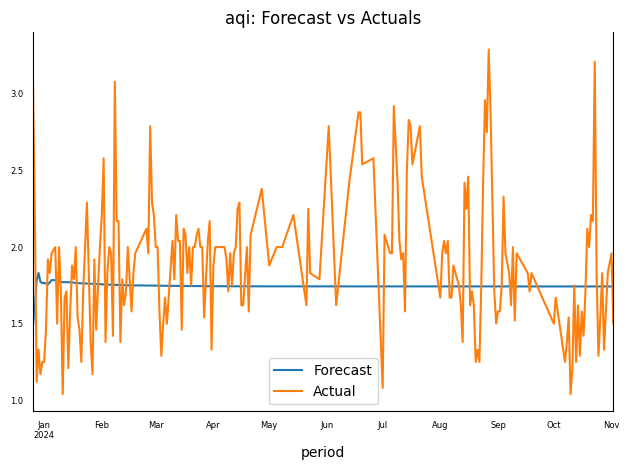

In [28]:
fig, ax = plt.subplots()

df_forecast['aqi'].plot(legend=True, ax=ax, label='Forecast').autoscale(axis='x', tight=True)
var_test['aqi'].plot(legend=True, ax=ax, label='Actual')

ax.set_title('aqi: Forecast vs Actuals')

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.spines["top"].set_alpha(0)
ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()

In [29]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'corr':corr})

In [30]:
print('Forecast Accuracy of: aqi')
accuracy_prod = forecast_accuracy(df_forecast['aqi'].values, var_test['aqi'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: aqi
mape :  0.1846
me :  -0.1494
mae :  0.3576
mpe :  -0.0277
rmse :  0.4734
corr :  -0.2832


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = var_data

X = data[['natural_gas_value', 'coal_value']]
y = data['aqi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## RandomForestRegressor

MSE: 0.26947840111111115, R²: -0.37797843810804066


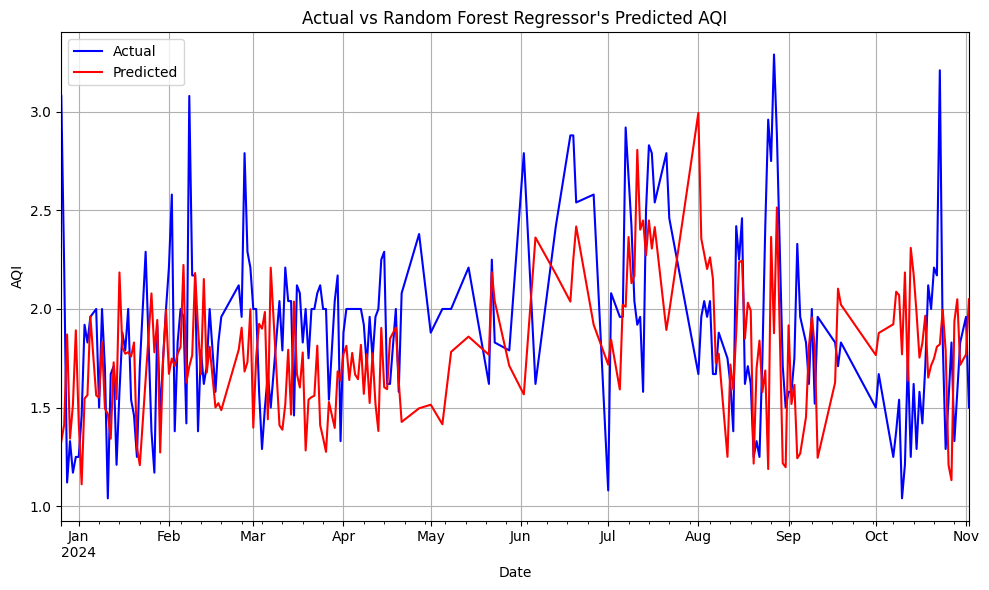

In [52]:
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train)

rfr_predictions = rfr_model.predict(X_test)

# Evaluating the model
rfr_mse = mean_squared_error(y_test, rfr_predictions)
rfr_r2 = r2_score(y_test, rfr_predictions)
print(f"MSE: {rfr_mse}, R²: {rfr_r2}")

rfr_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': rfr_predictions}, index=y_test.index)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))

# Plotting the actual AQI values
rfr_results_df['Actual'].plot(label='Actual', color='blue')

# Plotting the predicted AQI values
rfr_results_df['Predicted'].plot(label='Predicted', color='red')

# Customizing the plot
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title("Actual vs Random Forest Regressor's Predicted AQI")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## XGBoostRegressosr

MSE: 0.27901882626478075, R²: -0.42676342457795746


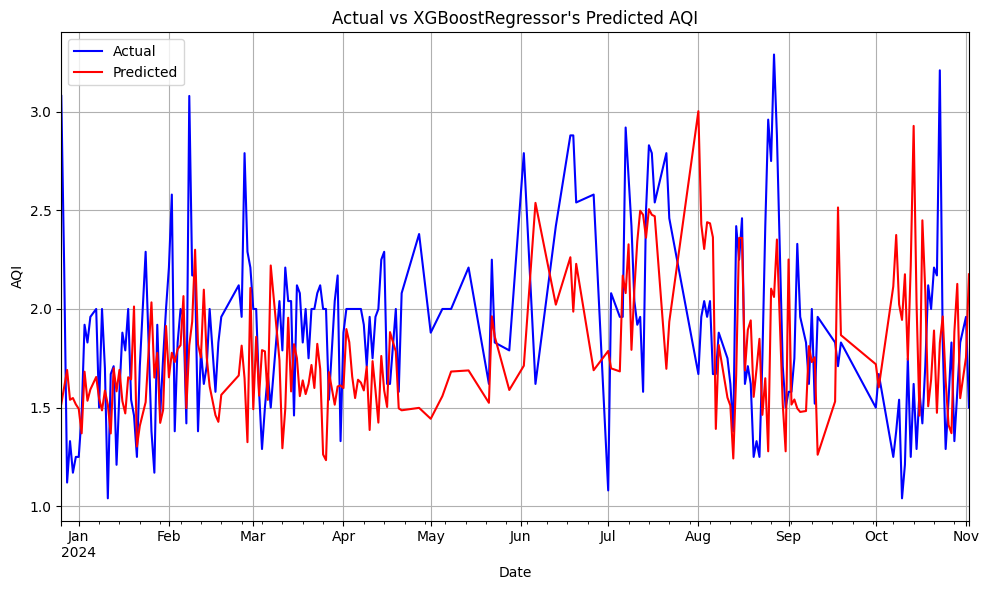

In [34]:
from xgboost import XGBRegressor
xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgboost_model.fit(X_train, y_train)
xg_predictions = xgboost_model.predict(X_test)

xg_mse = mean_squared_error(y_test, xg_predictions)
xg_r2 = r2_score(y_test, xg_predictions)
print(f"MSE: {xg_mse}, R²: {xg_r2}")

xg_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': xg_predictions}, index=y_test.index)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))

# Plotting the actual AQI values
xg_results_df['Actual'].plot(label='Actual', color='blue')

# Plotting the predicted AQI values
xg_results_df['Predicted'].plot(label='Predicted', color='red')

# Customizing the plot
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title("Actual vs XGBoostRegressor's Predicted AQI")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Support Vector Regressor(SVR)

MSE: 0.2078698926863299, R²: -0.06294318532597387


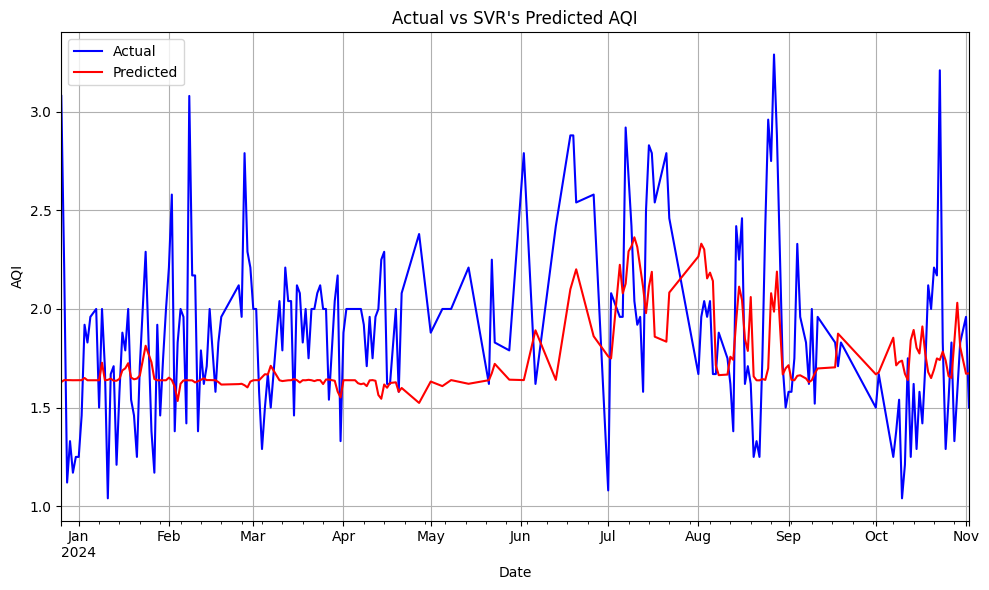

In [35]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print(f"MSE: {svr_mse}, R²: {svr_r2}")

svr_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': svr_predictions}, index=y_test.index)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))

# Plotting the actual AQI values
svr_results_df['Actual'].plot(label='Actual', color='blue')

# Plotting the predicted AQI values
svr_results_df['Predicted'].plot(label='Predicted', color='red')

# Customizing the plot
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title("Actual vs SVR's Predicted AQI")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Multi-Layer Perceptron

MSE: 0.49184564363951916, R²: -1.515053855960716


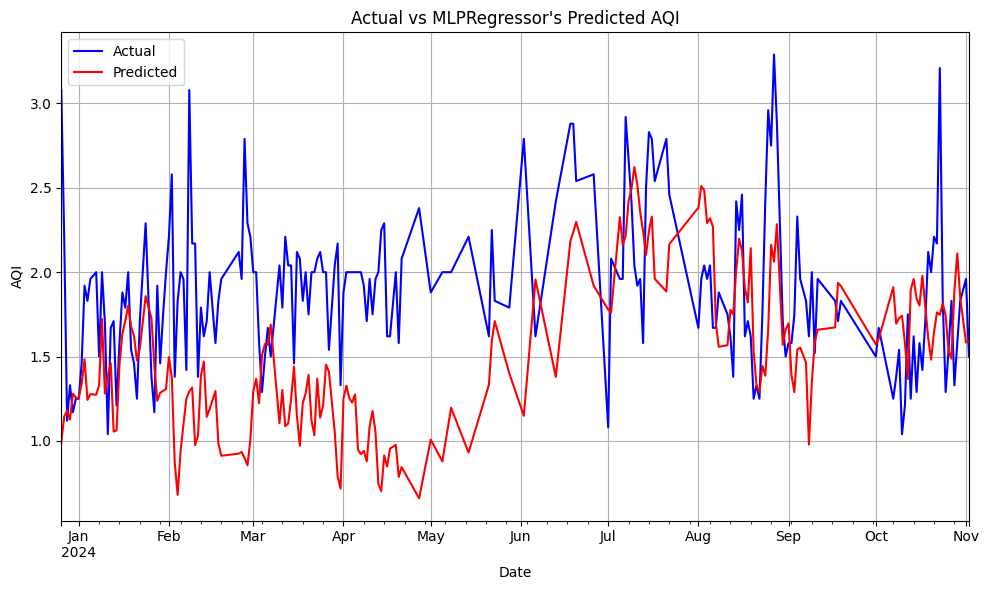

In [36]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_predictions = mlp_model.predict(X_test)

mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_r2 = r2_score(y_test, mlp_predictions)
print(f"MSE: {mlp_mse}, R²: {mlp_r2}")

mlp_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': mlp_predictions}, index=y_test.index)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))

# Plotting the actual AQI values
mlp_results_df['Actual'].plot(label='Actual', color='blue')

# Plotting the predicted AQI values
mlp_results_df['Predicted'].plot(label='Predicted', color='red')

# Customizing the plot
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title("Actual vs MLPRegressor's Predicted AQI")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## LGBMRegressor
efficient implementation of gradient boosting that is highly optimized for speed and performance, especially with larger datasets.

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 2
[LightGBM] [Info] Start training from score 1.736286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

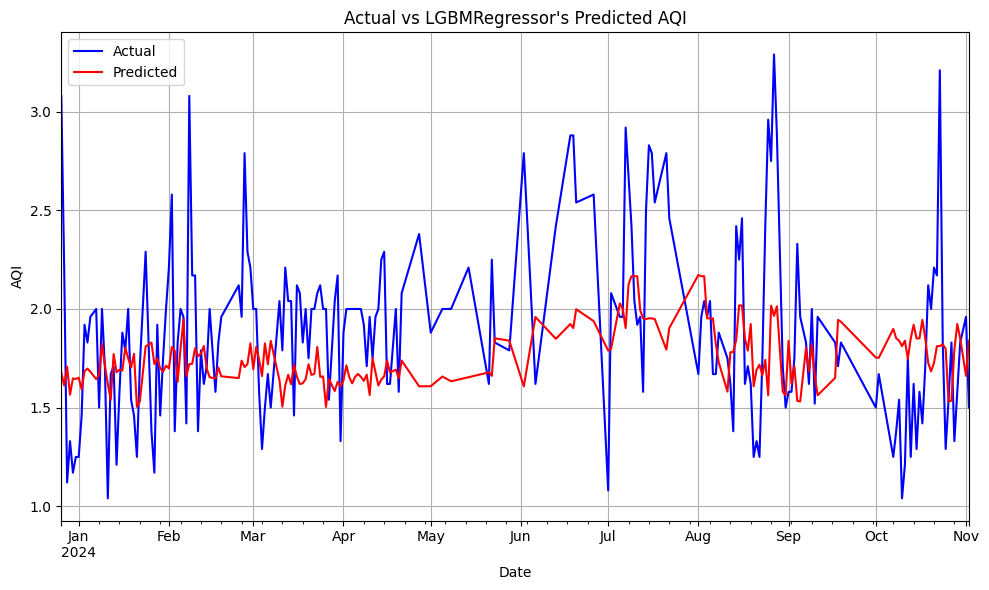

In [37]:
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.01)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)

lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
lgbm_r2 = r2_score(y_test, lgbm_predictions)
print(f"MSE: {lgbm_mse}, R²: {lgbm_r2}")

lgbm_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': lgbm_predictions}, index=y_test.index)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))

# Plotting the actual AQI values
lgbm_results_df['Actual'].plot(label='Actual', color='blue')

# Plotting the predicted AQI values
lgbm_results_df['Predicted'].plot(label='Predicted', color='red')

# Customizing the plot
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title("Actual vs LGBMRegressor's Predicted AQI")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## CatBoost

In [38]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


MSE: 0.20748496836199448, R²: -0.06097487388783818


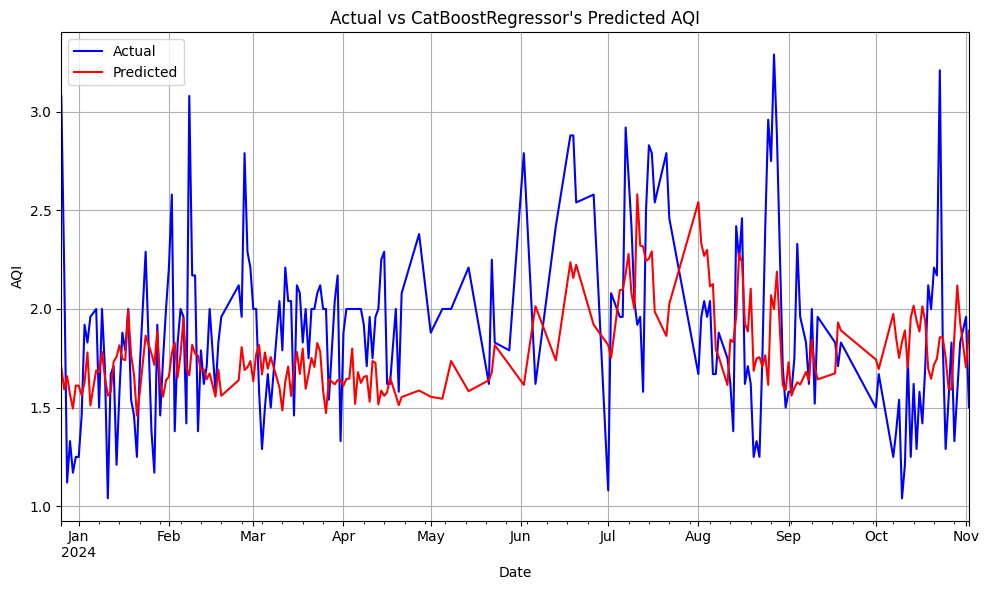

In [39]:
import numpy
from catboost import CatBoostRegressor
catb_model = CatBoostRegressor(iterations=100, learning_rate=0.1, verbose=0)
catb_model.fit(X_train, y_train)
catb_predictions = catb_model.predict(X_test)

catb_mse = mean_squared_error(y_test, catb_predictions)
catb_r2 = r2_score(y_test, catb_predictions)
print(f"MSE: {catb_mse}, R²: {catb_r2}")

catb_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': catb_predictions}, index=y_test.index)

plt.figure(figsize=(10, 6))

# Plotting the actual AQI values
catb_results_df['Actual'].plot(label='Actual', color='blue')

# Plotting the predicted AQI values
catb_results_df['Predicted'].plot(label='Predicted', color='red')

# Customizing the plot
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title("Actual vs CatBoostRegressor's Predicted AQI")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## ElasticNet
A combination of Ridge and Lasso Regressions

MSE: 0.20811559413777175, R²: -0.06419958027600603


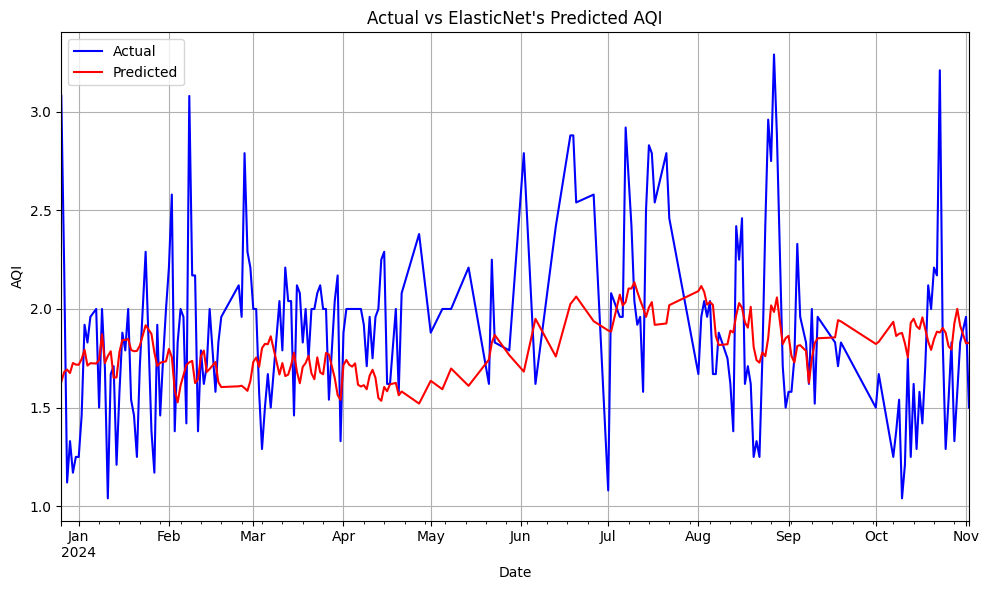

In [40]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)
elastic_predictions = elastic_model.predict(X_test)

elastic_mse = mean_squared_error(y_test, elastic_predictions)
elastic_r2 = r2_score(y_test, elastic_predictions)
print(f"MSE: {elastic_mse}, R²: {elastic_r2}")

elastic_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': elastic_predictions}, index=y_test.index)

plt.figure(figsize=(10, 6))

elastic_results_df['Actual'].plot(label='Actual', color='blue')
elastic_results_df['Predicted'].plot(label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title("Actual vs ElasticNet's Predicted AQI")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## AdaBoost

MSE: 0.1931692515236021, R²: 0.012228577847171906


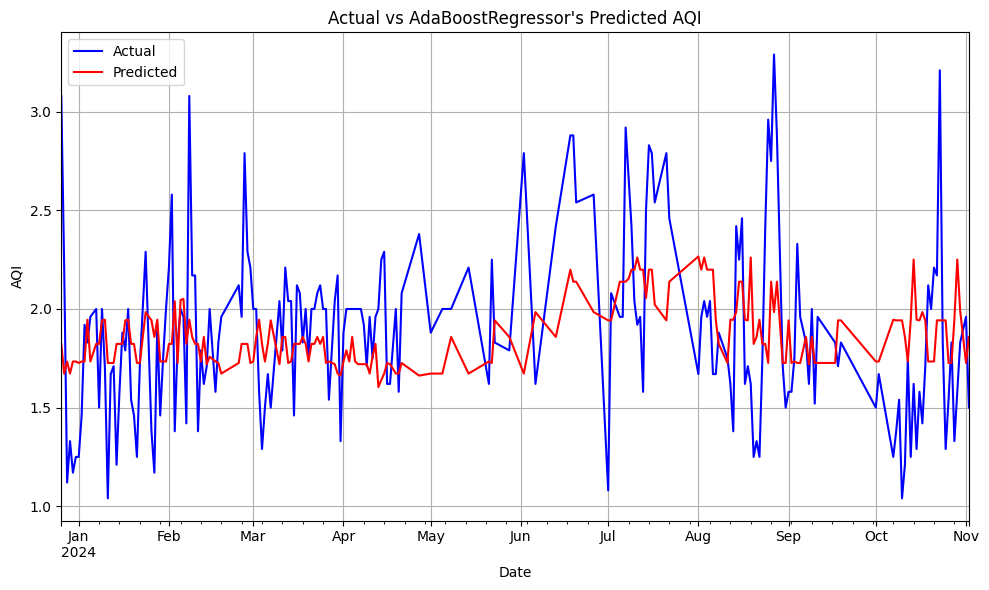

In [41]:
from sklearn.ensemble import AdaBoostRegressor
adab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
adab_model.fit(X_train, y_train)
adab_predictions = adab_model.predict(X_test)

adab_mse = mean_squared_error(y_test, adab_predictions)
adab_r2 = r2_score(y_test, adab_predictions)
print(f"MSE: {adab_mse}, R²: {adab_r2}")

adab_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': adab_predictions}, index=y_test.index)

plt.figure(figsize=(10, 6))

adab_results_df['Actual'].plot(label='Actual', color='blue')
adab_results_df['Predicted'].plot(label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title("Actual vs AdaBoostRegressor's Predicted AQI")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## LSTM

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4343224.5000 
Epoch 1: val_loss improved from inf to 229829.10938, saving model to best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 3921980.5000 - val_loss: 229829.1094 - learning_rate: 0.0010
Epoch 2/100
13/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 813970.3125   
Epoch 2: val_loss improved from 229829.10938 to 6856.33105, saving model to best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 718066.0000 - val_loss: 6856.3311 - learning_rate: 0.0010
Epoch 3/100
11/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 386603.6562 
Epoch 3: val_loss improved from 6856.33105 to 650.13031, saving model to best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 375434.8750 - val_loss: 650.1303 - learning_rate: 0.0010
Epoch 4/100
11/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 320585.1250 
Epoch 4: val_loss did not improve from 650.13031
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 303973.0625 - val_loss: 5222.3032 - le

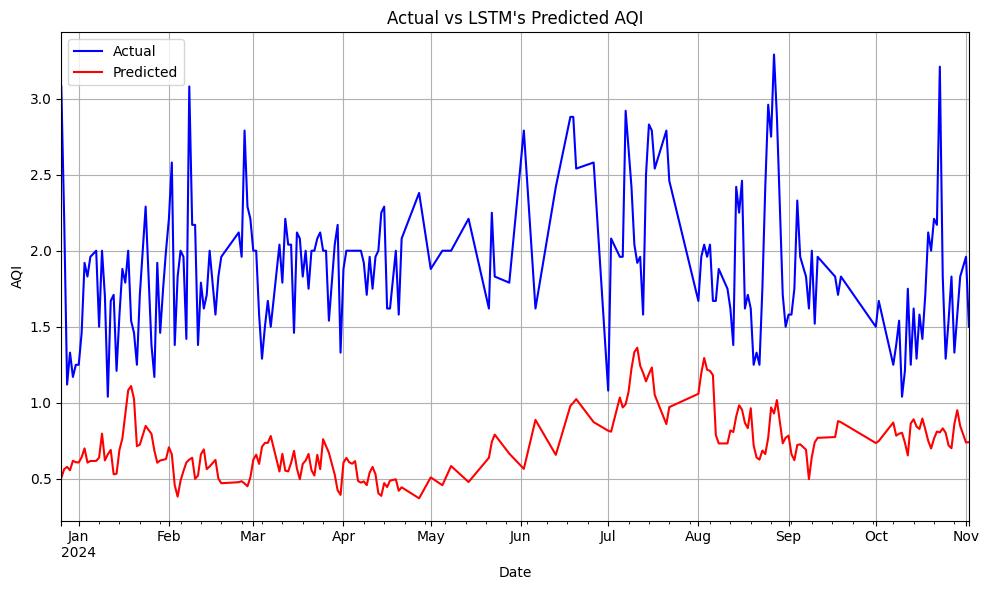

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential()

# First LSTM layer with return_sequences=True for stacking another LSTM layer
lstm_model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dropout(0.2))

# Second LSTM layer
lstm_model.add(LSTM(50, activation='relu'))
lstm_model.add(Dropout(0.2))

# Dense output layer
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Define callbacks for training
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Train the model
lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=100,  # Increased epochs for better learning
    batch_size=32,
    validation_split=0.2,  # Validation data to monitor overfitting
    callbacks=[checkpoint, early_stopping, reduce_lr],
    verbose=1
)

# Make predictions
lstm_predictions = lstm_model.predict(X_test_reshaped)

lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)
print(f"MSE: {lstm_mse}, R²: {lstm_r2}")
print(checkpoint)
lstm_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': lstm_predictions.flatten()}, index=y_test.index)

plt.figure(figsize=(10, 6))

lstm_results_df['Actual'].plot(label='Actual', color='blue')
lstm_results_df['Predicted'].plot(label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title("Actual vs LSTM's Predicted AQI")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [45]:
print('Forecast Accuracy of: Random Forest Regressor')
accuracy_prod = forecast_accuracy(rfr_results_df['Predicted'], rfr_results_df['Actual'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: XGBoostRegressor')
accuracy_prod = forecast_accuracy(xg_results_df['Predicted'], xg_results_df['Actual'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: SVR')
accuracy_prod = forecast_accuracy(svr_results_df['Predicted'], svr_results_df['Actual'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: MLPRegressor')
accuracy_prod = forecast_accuracy(mlp_results_df['Predicted'], mlp_results_df['Actual'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: LGBMRegressor')
accuracy_prod = forecast_accuracy(lgbm_results_df['Predicted'], lgbm_results_df['Actual'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
print('Forecast Accuracy of: CatBoostRegressor')
accuracy_prod = forecast_accuracy(catb_results_df['Predicted'], catb_results_df['Actual'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: ElasticNet')
accuracy_prod = forecast_accuracy(elastic_results_df['Predicted'], elastic_results_df['Actual'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: LSTM')
accuracy_prod = forecast_accuracy(lstm_results_df['Predicted'], lstm_results_df['Actual'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: AdaBoostRegressor')
accuracy_prod = forecast_accuracy(adab_results_df['Predicted'], adab_results_df['Actual'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: Random Forest Regressor
mape :  0.2212
me :  -0.1131
mae :  0.4109
mpe :  -0.0135
rmse :  0.5191
corr :  0.1522
Forecast Accuracy of: XGBoostRegressor
mape :  0.2268
me :  -0.1212
mae :  0.422
mpe :  -0.017
rmse :  0.5282
corr :  0.1371
Forecast Accuracy of: SVR
mape :  0.189
me :  -0.1566
mae :  0.3655
mpe :  -0.0382
rmse :  0.4559
corr :  0.2861
Forecast Accuracy of: MLPRegressor
mape :  0.288
me :  -0.3963
mae :  0.5685
mpe :  -0.1709
rmse :  0.7013
corr :  0.1446
Forecast Accuracy of: LGBMRegressor
mape :  0.1886
me :  -0.1407
mae :  0.3617
mpe :  -0.0267
rmse :  0.4582
corr :  0.2045
Forecast Accuracy of: CatBoostRegressor
mape :  0.1929
me :  -0.1151
mae :  0.3641
mpe :  -0.015
rmse :  0.4555
corr :  0.2482
Forecast Accuracy of: ElasticNet
mape :  0.1945
me :  -0.1013
mae :  0.3642
mpe :  -0.0032
rmse :  0.4562
corr :  0.1425
Forecast Accuracy of: LSTM
mape :  0.5995
me :  -1.1712
mae :  1.1712
mpe :  -0.5995
rmse :  1.2584
corr :  0.1458
Forecast Accuracy o

In [58]:
rfr_results_df_reset = rfr_results_df.reset_index()
xg_results_df_reset = xg_results_df.reset_index()
svr_results_df_reset = svr_results_df.reset_index()
mlp_results_df_reset = mlp_results_df.reset_index()
lgbm_results_df_reset = lgbm_results_df.reset_index()
catb_results_df_reset = catb_results_df.reset_index()
elastic_results_df_reset = elastic_results_df.reset_index()
lstm_results_df_reset = lstm_results_df.reset_index()
adab_results_df_reset = adab_results_df.reset_index()
var_results_df_reset = df_forecast.reset_index()

In [59]:
model_results_dfs =[
    rfr_results_df_reset,
    xg_results_df_reset,
    svr_results_df_reset,
    mlp_results_df_reset,
    lgbm_results_df_reset,
    catb_results_df_reset,
    elastic_results_df_reset,
    lstm_results_df_reset,
    adab_results_df_reset,
    var_results_df_reset
]

In [60]:
model_file_names = [
    'RandomForestRegressor_results.csv',
    'XGBoostRegressor_results.csv',
    'SVR_results.csv',
    'MLPRegressor_results.csv',
    'LGBMRegressor_results.csv',
    'CatBoostRegressor_results.csv',
    'ElasticNet_results.csv',
    'LSTM_results.csv',
    'AdaBoostRegressor_results.csv',
    'VectorAutoRegression_results.csv'
]

In [63]:
# export outputs as csv file
file_path = '/content/drive/My Drive/DS598_model_results/'
#left_join_df.to_csv(file_path)

for i in range(len(model_results_dfs)):
    model_results_dfs[i].to_csv(file_path + model_file_names[i])